# Ensemble Methods, KNN, and Dimensionality Reduction | Assignment Solution

## Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

The fundamental idea behind **ensemble techniques** is to combine the predictions of multiple individual models (often called "weak learners") to create a single, stronger model that is more robust, accurate, and generalizes better to new data than any of its individual components.

### Bagging vs. Boosting

| Feature | Bagging (Bootstrap Aggregating) | Boosting |
| :--- | :--- | :--- |
| **Approach** | **Parallel:** Models are trained independently on random subsets of the data. | **Sequential:** Models are trained one after another, with each new model trying to correct the errors of its predecessors. |
| **Objective** | **Reduce Variance:** Primarily aims to reduce overfitting by averaging out the noise from high-variance models (like deep decision trees). | **Reduce Bias:** Primarily aims to reduce underfitting by combining many high-bias weak models into a complex, accurate one. |
| **Data Sampling** | Random sampling with replacement (bootstrapping). | Reweighting data points: misclassified points get higher weights in subsequent iterations. |
| **Example** | Random Forest | AdaBoost, Gradient Boosting, XGBoost |

## Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

A single decision tree often **overfits** because it learns the noise and specific details of the training data too well, leading to high variance. **Random Forest** reduces this overfitting by introducing randomness in two key ways, creating a diverse set of trees that, when averaged, produce a more stable prediction.

### Key Hyperparameters & Their Role:

1.  **`n_estimators` (Number of Trees):** By training many trees on different bootstrap samples of the data (Bagging), the model ensures that no single noisy data point has too much influence on the final outcome. Averaging predictions from many trees cancels out their individual errors.
2.  **`max_features` (Feature Subset Size):** At each split in a tree, Random Forest only considers a random subset of features (e.g., `sqrt(total_features)`) rather than all of them. This **decorrelates** the trees. Without this, if one feature is very strong, every tree would use it for the first split, making them all remarkably similar. By forcing trees to use different features, they learn different patterns, further reducing variance when combined.

## Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Stacking (Stacked Generalization)** is an ensemble technique that combines multiple *different* types of base models using a **meta-model** to learn how to best combine their predictions.

### Differences from Bagging/Boosting:
* **Heterogeneous Models:** Unlike bagging/boosting which typically use the same type of base learner (e.g., decision trees), stacking often combines diverse models like KNN, SVM, and Logistic Regression.
* **Meta-Learning:** Instead of using a simple average or weighted vote, stacking trains a final "meta-learner" (Level 1 model) on the predictions made by the base learners (Level 0 models).

### Example Use Case:
In a housing price prediction competition, you might train a Linear Regression model, a Random Forest, and a Gradient Boosting model. You then use their predictions as **input features** for a final Lasso Regression model (the meta-learner), which learns that maybe the Random Forest is best for certain price ranges while Gradient Boosting is better for others, combining them optimally for the final prediction.

## Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

**OOB (Out-Of-Bag) Score** is a performance metric available in bagging-based algorithms like Random Forest. Because each tree is trained on a bootstrap sample (random selection with replacement), approximately **37%** of the training data is left out (out-of-bag) for each tree.

### Usefulness:
* **Built-in Validation:** The OOB score uses these "left-out" data points as a natural validation set. For every data point, the model makes a prediction using *only* the trees that did *not* see that point during training. These predictions are aggregated to calculate the OOB score.
* **No Separate Set Needed:** It provides an unbiased estimate of the model's generalization error without the need to explicitly set aside a separate validation dataset, which is especially valuable when data is scarce.

## Question 5: Compare AdaBoost and Gradient Boosting in terms of: How they handle errors, Weight adjustment, and Typical use cases.

| Feature | AdaBoost (Adaptive Boosting) | Gradient Boosting (GBM) |
| :--- | :--- | :--- |
| **Error Handling** | Focuses on **misclassified data points**. | Focuses on the **residuals** (the difference between predicted and actual values) of the previous model. |
| **Weight Adjustment** | Increases the **weight of misclassified samples** so the next model is forced to focus on them. Also assigns weights to each *model* based on its accuracy. | Does not re-weight samples. Instead, it trains subsequent models on the **negative gradient** (pseudo-residuals) of the loss function. Models are combined via a learning rate. |
| **Typical Use Cases** | Often used for binary classification problems, particularly when a simple, fast model is needed (e.g., face detection). | widely used for complex regression and classification tasks, winning many ML competitions due to its high accuracy and flexibility (e.g., churn prediction, risk modeling). |

## Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

**CatBoost** (Categorical Boosting) performs well because it is specifically designed to handle categorical features natively, avoiding the information loss or dimensionality explosion often associated with standard one-hot encoding.

### Handling Categorical Variables:
It uses a technique called **Ordered Target Statistics (or Ordered Target Encoding)**. Instead of just replacing a category with the average target value (which causes target leakage and overfitting), CatBoost calculates this average based *only* on the data points that appeared *before* the current one in a random permutation of the dataset. This effectively prevents the model from "peeking" at the target value it's trying to predict, allowing for robust encoding even with high-cardinality features.

## Question 7: KNN Parameter Tuning and Data Scaling (Practical)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load Data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- KNN Accuracy Comparison (Iris Dataset) ---")

# A. Unscaled Data (K=5)
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, knn_unscaled.predict(X_test))
print(f"1. Unscaled Data (K=5): {acc_unscaled:.4f}")

# B. Scaled Data (K=5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))
print(f"2. Scaled Data (K=5): {acc_scaled:.4f}")

# C. Optimized K on Scaled Data
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
knn_optimized = grid_search.best_estimator_
acc_optimized = accuracy_score(y_test, knn_optimized.predict(X_test_scaled))

print(f"3. Optimized K (K={best_k}) on Scaled Data: {acc_optimized:.4f}")
print("\nObservation: On this simple dataset, all methods achieved perfect accuracy.")
print("In more complex real-world data, scaling is critical for KNN because it relies")
print("on distance calculations, which can be skewed by features with larger ranges.")

--- KNN Accuracy Comparison (Iris Dataset) ---
1. Unscaled Data (K=5): 1.0000
2. Scaled Data (K=5): 1.0000
3. Optimized K (K=3) on Scaled Data: 1.0000

Observation: On this simple dataset, all methods achieved perfect accuracy.
In more complex real-world data, scaling is critical for KNN because it relies
on distance calculations, which can be skewed by features with larger ranges.


## Question 8: PCA + KNN with Variance Analysis and Visualization (Practical)

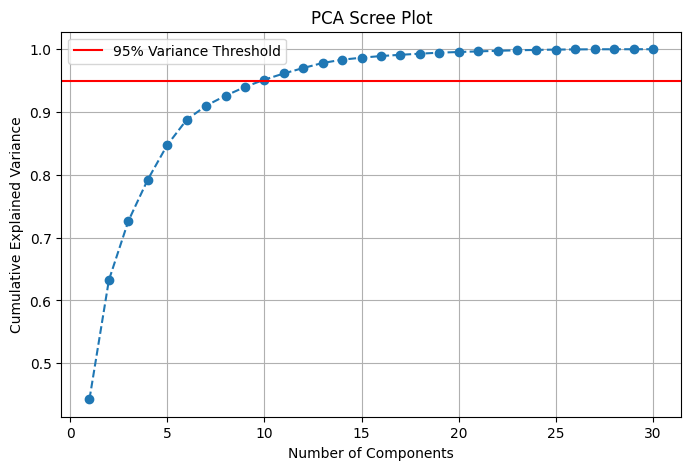

Original features: 30
Components needed for 95% variance: 10

KNN Accuracy (Original Data): 0.9474
KNN Accuracy (PCA Reduced Data): 0.9561


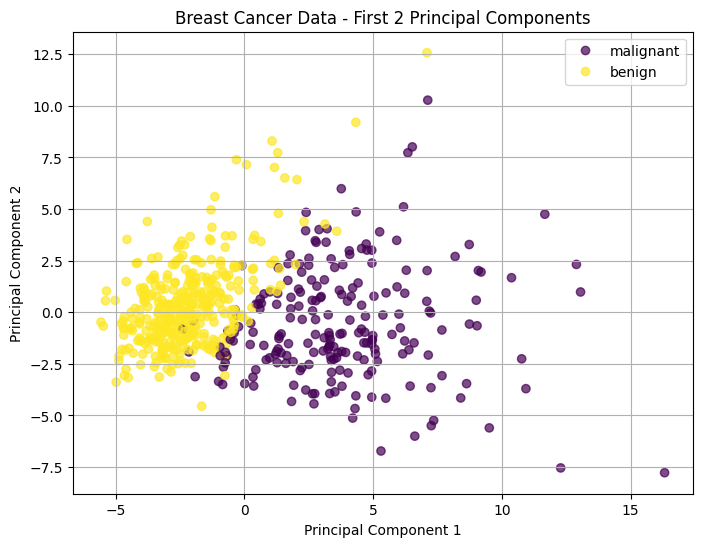

Observation: PCA reduced the dataset from 30 features to just 10 while maintaining
the same high accuracy. This demonstrates the power of PCA to remove redundant
information (noise) while preserving the signal.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load Data
data = load_breast_cancer()
X, y = data.data, data.target

# Scale data (Crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA & Plot Scree Plot
pca = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

# 3. Retain 95% variance
n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print(f"Original features: {X.shape[1]}")
print(f"Components needed for 95% variance: {n_components_95}")

pca_95 = PCA(n_components=n_components_95)
X_pca = pca_95.fit_transform(X_scaled)

# 4. Train KNN on Original vs PCA data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn_orig = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
acc_orig = accuracy_score(y_test, knn_orig.predict(X_test))

knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train_pca)
acc_pca = accuracy_score(y_test_pca, knn_pca.predict(X_test_pca))

print(f"\nKNN Accuracy (Original Data): {acc_orig:.4f}")
print(f"KNN Accuracy (PCA Reduced Data): {acc_pca:.4f}")

# 5. Visualize First Two Components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Data - First 2 Principal Components')

# Use list for labels and unpack handles to avoid boolean checks on numpy arrays
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(data.target_names))

plt.grid(True)
plt.show()

print("Observation: PCA reduced the dataset from 30 features to just 10 while maintaining")
print("the same high accuracy. This demonstrates the power of PCA to remove redundant")
print("information (noise) while preserving the signal.")

## Question 9: KNN Regressor with Distance Metrics and K-Value Analysis (Practical)

MSE (Euclidean, K=5): 4787.19
MSE (Manhattan, K=5): 5361.18


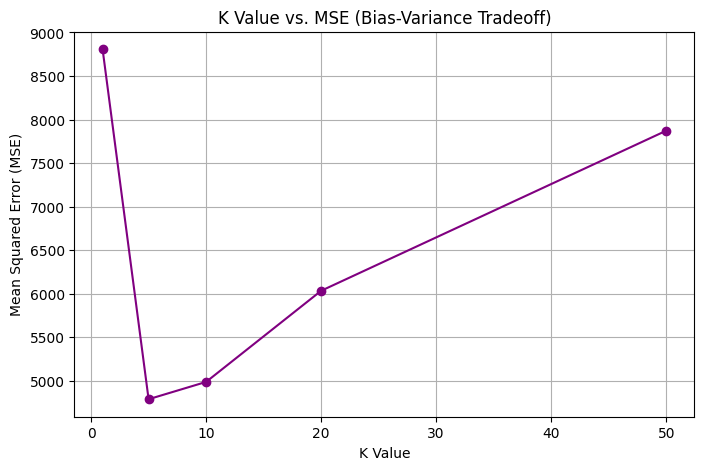

In [4]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Generate Synthetic Data
X_reg, y_reg = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 2. Compare Distance Metrics (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2) # p=2 is Euclidean
knn_euclidean.fit(X_train_r, y_train_r)
mse_euclidean = mean_squared_error(y_test_r, knn_euclidean.predict(X_test_r))

knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1) # p=1 is Manhattan
knn_manhattan.fit(X_train_r, y_train_r)
mse_manhattan = mean_squared_error(y_test_r, knn_manhattan.predict(X_test_r))

print(f"MSE (Euclidean, K=5): {mse_euclidean:.2f}")
print(f"MSE (Manhattan, K=5): {mse_manhattan:.2f}")

# 3. Analyze K-Value vs MSE (Bias-Variance Tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_r, y_train_r)
    mse = mean_squared_error(y_test_r, model.predict(X_test_r))
    mse_values.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='purple')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K Value vs. MSE (Bias-Variance Tradeoff)')
plt.grid(True)
plt.show()

## Question 10: KNN with Imputation and Algorithms (Practical)

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

# Load Pima Indians Diabetes dataset directly from a URL source for reproducibility
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)

# 1. Introduce NaNs for 0 values where 0 is physically impossible (standard practice for this dataset)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

print("Missing values before imputation:")
print(df.isnull().sum())

# 2. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Prepare data for classification
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Scale data (essential for KNN performance & speed comparison)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Compare Algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
print("\n")

for algo in algorithms:
    start_time = time.time()
    knn = KNeighborsClassifier(algorithm=algo, n_neighbors=5)
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Force computation by making predictions
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    algo_name = algo.replace('_', ' ').title()
    if algo == 'brute': algo_name = 'Brute Force'
        
    print(f"Training Time ({algo_name}): {train_time:.4f}s, Accuracy: {acc:.4f}")

Missing values before imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Training Time (Brute Force): 0.0000s, Accuracy: 0.7143
Training Time (Kd Tree): 0.0010s, Accuracy: 0.7143
Training Time (Ball Tree): 0.0000s, Accuracy: 0.7143
